In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('dataset\cat_train.csv')
df.head(10)

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,...,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,...,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0
5,5,0.0,NaN,1.0,T,N,Red,Triangle,Lion,China,...,05afc0f8b,2.0,Expert,Hot,b,Q,wa,3.0,4.0,0
6,6,0.0,0.0,0.0,F,N,Red,Triangle,Hamster,Costa Rica,...,4d3766412,1.0,Grandmaster,Cold,c,R,rg,5.0,6.0,0
7,7,0.0,0.0,1.0,T,N,Red,Triangle,Axolotl,Finland,...,a651dec43,3.0,Expert,Cold,b,Y,PS,1.0,1.0,0
8,8,0.0,0.0,0.0,F,N,Blue,Polygon,Hamster,Russia,...,NaN,1.0,Novice,Boiling Hot,c,N,mX,6.0,3.0,0
9,9,0.0,0.0,NaN,F,Y,Red,Polygon,Hamster,Finland,...,79b29d54c,3.0,Contributor,Lava Hot,n,I,OZ,1.0,8.0,1


In [19]:
df.shape

(600000, 25)

This dataset consists of all kinds of categorical variable

- Nominal
- Ordinal
- Cyclic
- Binary

it is a binary classification problem
The target is not important for us to learn about the categorical variable , but we will be building an end to end model so let's take a look at the target

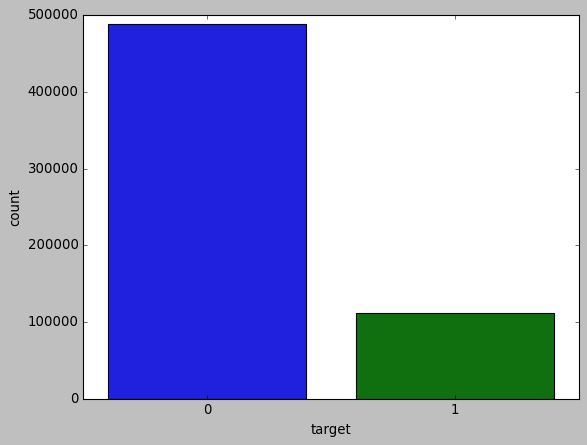

In [14]:
from matplotlib import style
style.use('classic')
sns.countplot(x = df['target'])
plt.show()

 we see that the target is skewed and thus the metrics for this problem would be ROC curve . we can use precision or recall but  AUC combines these two metrics .  Thus we will be using AUC to evaluate the model that we build

Overall there are:
- Five binary variables
- Ten nominal variables
- Six ordinary variables
- Two cyclic variables
- one Target variable

Let's look at "ord_2" feature in the dataset .  It consist of six different categories:
- Freezing
- Warm
- Cold
- Boiling Hot
- Hot
- Lava Hot

We know that the computer does not understand the text data and Thus , we need to convert these categories to numbers.  A simple way of doing this would be to create a dictionary that maps these values to numbers satarting from 0 to N-1 ,  where N is the total number of categories im a given feature

In [15]:
df.ord_2.unique()

array(['Hot', 'Warm', 'Freezing', 'Lava Hot', 'Cold', 'Boiling Hot', nan],
      dtype=object)

In [16]:
mapping = {
      'Freezing' : 0,
      'Cold' : 1,
      'Warm' : 2,
      'Hot' : 3,
      'Boiling Hot' : 4,
      'Lava Hot' : 5 
}

In [18]:
# value count before the mapping
df.ord_2.value_counts()

Freezing       142726
Warm           124239
Cold            97822
Boiling Hot     84790
Hot             67508
Lava Hot        64840
Name: ord_2, dtype: int64

In [20]:
df.loc[ : , 'ord_2'] = df.ord_2.map(mapping)

In [21]:
# value count after mapping
df.ord_2.value_counts()

0.0    142726
2.0    124239
1.0     97822
4.0     84790
3.0     67508
5.0     64840
Name: ord_2, dtype: int64